In [1]:
from qiskit import QuantumRegister, QuantumCircuit
import matplotlib

In [6]:
from qiskit_ibm_provider import IBMProvider

IBMProvider.delete_account()

True

In [7]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account('a61b0d433baef68de9ab3f1125d0bb1ac842daaed6a1e04d6f50144bb06ca6b2e03c77bc98e127da9c4e2261ea1decee3a873a2f3651c140a8c8cc753f8d8a77')
provider = IBMProvider()
provider.active_account()
# IBMProvider.delete_account()

{'channel': 'ibm_quantum',
 'token': 'a61b0d433baef68de9ab3f1125d0bb1ac842daaed6a1e04d6f50144bb06ca6b2e03c77bc98e127da9c4e2261ea1decee3a873a2f3651c140a8c8cc753f8d8a77',
 'url': 'https://auth.quantum-computing.ibm.com/api',
 'verify': True,
 'instance': 'ibm-q/open/main'}

In [3]:
import numpy as np
import random

# 生成一个5x5的随机数组，每个值大于0
# positive_random_array = np.random.uniform(0.1, 10.0, (4, 2))
for i in range(6):
    positive_random_array = random.randint(1, 20)

    print(positive_random_array)

9
12
10
4
13
4


In [11]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np

S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

point1 = (1, 1)
point2 = (19, 19)

q = QuantumRegister(3)
cl = ClassicalRegister(1)
qc = QuantumCircuit(q, cl)

delta_x = (point1[0] - 1) / (1.0 * 19)
delta_y = (point1[1] - 1) / (1.0 * 19)
theta = np.pi / 2 * (delta_x + delta_y)
phi = np.pi / 2 * (delta_x - delta_y + 1)
qc.u(theta, phi, 0, q[1])

delta_x = (point2[0] - 1) / (1.0 * 19)
delta_y = (point2[1] - 1) / (1.0 * 19)
theta = np.pi / 2 * (delta_x + delta_y)
phi = np.pi / 2 * (delta_x - delta_y + 1)
qc.u(theta, phi, 0, q[2])

qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.h(q[0])

qc.measure(q[0], cl[0])
job = execute(qc, M_simulator, shots=10000)
job.result().get_counts()

{'1': 4952, '0': 5048}

In [21]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Options
service = QiskitRuntimeService()
backend = 'ibm_kyoto'
session = Session.from_id("cnr0q6wgsbh0008swej0", service, backend)

print(session.details())
print(session.status())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14376\2207641361.py:4: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.15.0 and will be removed no sooner than 3 months after the release date. Sessions do not support multiple backends.
  session = Session.from_id("cnr0q6wgsbh0008swej0", service, backend)


{'id': 'cnr0q6wgsbh0008swej0', 'backend_name': 'ibm_brisbane', 'interactive_timeout': 2, 'max_time': 900, 'active_timeout': 900, 'state': 'closed', 'accepting_jobs': True, 'last_job_started': '2023-12-06T06:02:37.296Z', 'last_job_completed': '2023-12-06T06:46:50.870Z', 'started_at': '2023-12-06T06:02:37.296Z', 'closed_at': '2023-12-06T06:17:40.948Z'}
Closed


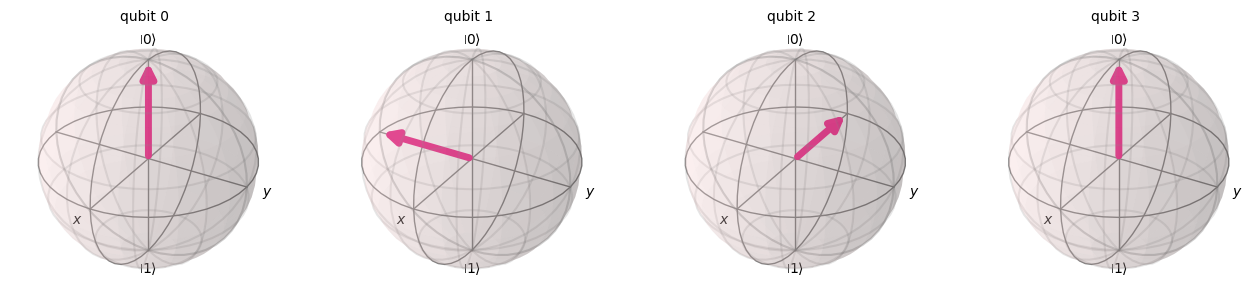

In [11]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(4)
for i in range(4):
    for _ in range(i):
        qc.u(m.pi / 2.0, -1 * m.pi / 2.0, 0, i)
#         qc.u(0, 0, m.pi / 4.0, i)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)

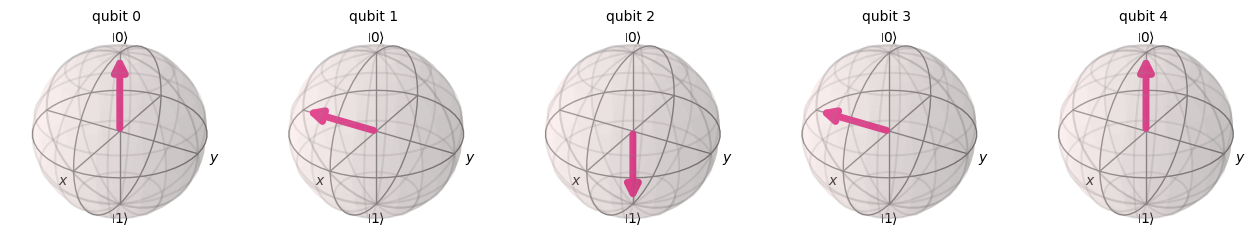

In [6]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(5)
for i in range(5):
    qc.u(i * m.pi / 2.0, -i * m.pi / 2.0, 0, i)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)

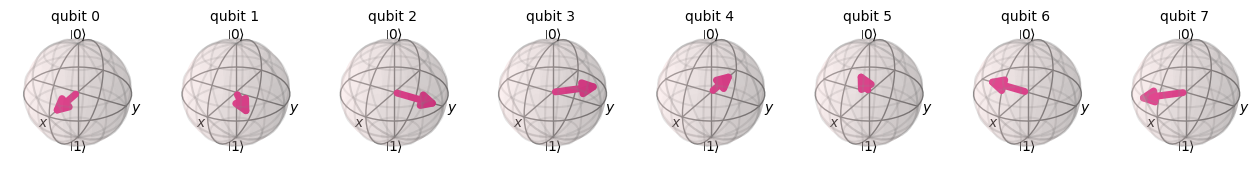

In [13]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(8)
for i in range(8):
    qc.h(i)
    qc.u(0, 0, i * m.pi / 4.0, i)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)

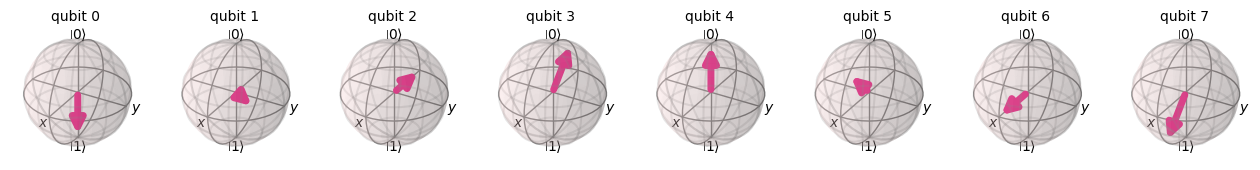

In [24]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(8)
for i in range(8):
    qc.x(i)
    qc.u(i * m.pi / 4.0, 0, -i * m.pi / 4.0, i)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)

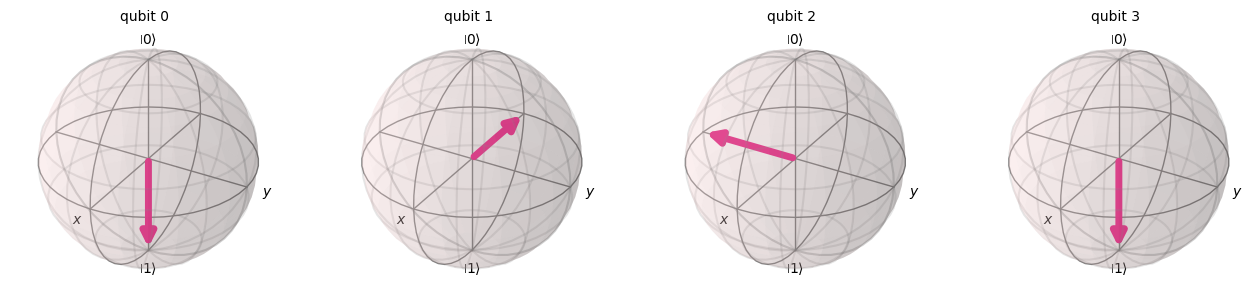

In [13]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(4)
for i in range(4):
    qc.x(i)
    for _ in range(i):
        qc.u(m.pi / 2.0, 0, m.pi / 2.0, i)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)

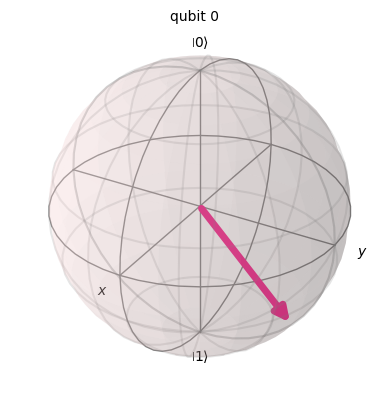

In [28]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(1)
qc.h(0)
qc.u(m.pi / 2.0, 0, m.pi / 4.0, 0)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)

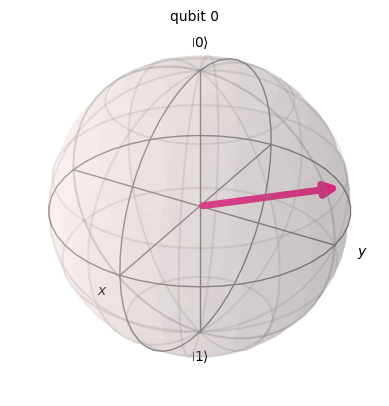

In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(1)
qc.h(0)
qc.u(m.pi / 2.0, 0, m.pi / 4.0, 0)
qc.u(m.pi / 2.0, 0, 0, 0)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)

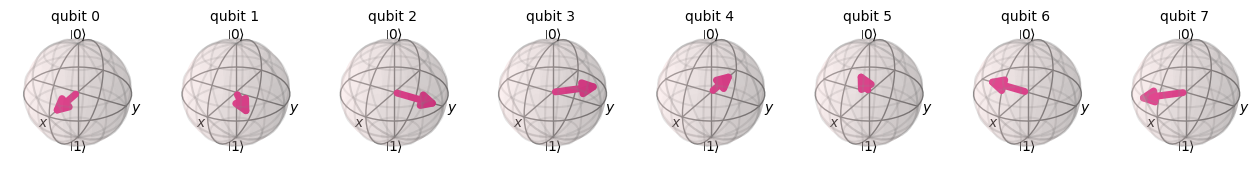

In [7]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector
import math as m

qc = QuantumCircuit(8)
for i in range(8):
    qc.h(i)
    qc.u(0, 0, i * m.pi / 4.0, i)

# 使用Aer模拟器获取Bloch球矢量
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc).result()
bloch_vector = result.get_statevector()

# 绘制Bloch球
plot_bloch_multivector(bloch_vector)